Ricardian Trade Model
=====================

This notebook explores the Ricardian 2 x 2 x 1 Model. 

  - 2 x Countries
  - 2 x Products
  - 1 x Factor (Labour)
  
This model is the most basic model required to explore the concept of Comparative Advantage. In this setting countries are identical except for production technology, typically thought of as labour productivity (given one factor). 

Assumptions
-----------
  - Full Employment
  - Homogenous Labour (i.e. can move freely between products)
  - Labour is immobile between countries

In [33]:
from __future__ import division

Model
-----

Python is a high level language which provides the infrastructure to build object oriented code. An OO approach is particularly useful in this context as it produces code that is organised according to their respective function. Let us build some Python objects to represent each element of this model. 
   
  - A Country Class
  - A Trade System Class to compute the interactions between countries



Modeling the Country
--------------------

In [4]:
class Country(object):
    """
    An object that represents a Country

    Parameters
    ----------
    name            :   str
                        Provide a country name
    products        :   Tuple(str, str)
                        Provide Product Names
    technology      :   Tuple(float, float)
                        Provide Technology/Productivity values where position equals product position
    """
    def __init__(self, name, products, technology):
        self.name = name
        self.products = products
        self.technology = technology
        self.exchange_rate = self.technology[0] / self.technology[1]
        #-Internal State Variables-#
        self.__output = (0,0)
        
    def __str__(self):
        try:
            units = self.units
        except:
            units = ("Unit of %s"%self.products[0], "Unit of %s"%self.products[1])
            self.units = units
        return "%s (%s - %s (Units of Labour/%s); %s - %s (Units of Labour/%s))" % (self.name, self.products[0], self.technology[0], units[0], self.products[1], self.technology[1], units[1])

    @property
    def output(self):
        return self.__output
    @output.setter
    def output(self, value):
        self.__output = value
    
    @property
    def print_output(self):
        print "%s: %s = %s; %s = %s" % (self.name, self.products[0], self.__output[0], self.products[1], self.__output[1])
    
    def set_units(self, units):
        """ 
        Set Units of Products
        
        Parameters
        ----------
        units  :  tuple(str, str)
                  Set Units of Product 1 and Product 2
        """
        self.units = units
        
    def difference_output(self, product, difference):
        """ 
        Provide a difference to the output of a given product
        
        Parameters
        ----------
        product      :  int
                        Provide Product ID 0, 1
        difference   :  numeric
                        Provide Difference in Output for the Product

        """ 
        if product == 0:
            q0 = self.__output[0] + difference
            q1 = self.__output[1] + -1 * difference * self.exchange_rate
            self.__output = (q0, q1)
        if product == 1:
            q0 = self.__output[0] + -1 * difference * 1 / self.exchange_rate
            q1 = self.__output[1] + difference
            self.__output = (q0, q1)

In [20]:
england = Country(name="England", products=('Wine', 'Cloth'), technology=(120, 100))
print england
portugal = Country(name="Portugal", products=('Wine', 'Cloth'), technology=(80, 90))
print portugal

England (Wine - 120 (Units of Labour/Unit of Wine); Cloth - 100 (Units of Labour/Unit of Cloth))
Portugal (Wine - 80 (Units of Labour/Unit of Wine); Cloth - 90 (Units of Labour/Unit of Cloth))


Let us first have a look at some some simple scenario based observations

Scenario 1: No Trade, Internal Reallocation
--------------------------------------------

Let us now consider a manual change in production for England and Portugal. Remember we have assumed full employment of labour, and homogenous labour that has the ability to move freely from wine production to cloth production. Therefore any reduction in the production of one good must increase the production in the other good - as labour is released and re-hired due to full employment. 


In [21]:
#-Initial Values-#
england.print_output
portugal.print_output

England: Wine = 0; Cloth = 0
Portugal: Wine = 0; Cloth = 0


In [16]:
#-Change Englands' Production by reducing Wine (Product 0) by 5 units-#
england.difference_output(0,-5)
england.print_output

England: Wine = -5; Cloth = 6.0


As you can observe, **reducing** wine production by 5 units, **increases** cloth production by 6 units. This is becuase when wine production is reduced labour is released. It takes 120 Units of Labour to make 1 x unit of wine. Therefore $120*5=600$ units of labour (i.e. Hours) are released. Due to the full employment assumption, this labour finds employment in the cloth making industry and therefore, as it requires 100 hours to produce a unit of cloth, cloth production increases by $600/100=6$ units. 

The internal exchange rate represents the **opportunity cost** of wine in terms of cloth. For each unit of wine, England could instead produce 1.2 units of cloth. 

In [23]:
print "Exchange rate = %s" % england.exchange_rate

Exchange rate = 1.2


In [24]:
#-Change Portugals' Production by reducing Wine Production (Product 0) by 5 units-#
portugal.difference_output(0, -5)
portugal.print_output

Portugal: Wine = -5; Cloth = 4.44444444444


In Portugal, **reducing** wine production by 5 units, **increases** cloth production by 4.44 units. This is due to the different internal opportunity cost Portugal faces when compared to England. Labour is immobile between countries. 

The **opportunity cost** of producing wine in terms of cloth is now 0.88. For each unit of wine, portugal could instead product 0.88 units of cloth. 

In [26]:
print "Exchange rate = %s" % portugal.exchange_rate

Exchange rate = 0.888888888889


TradeSystem
===========

Now we need a simple trade system object to compute items such as:

  - Global Production
  - Comparative Advantage
  - Absolute Advantage
  - Trade Equilibrium's
  
Let us start by simply modelling the aggregation of properties of two countries and checking for relative opportunity costs in the determination of comparative advantage

In [99]:
class TradeSystem2x2x1(object):
    """
    Constructs a 2x2x1 trading system of countries to compute various global values
    """
    def __init__(self, countries):
        self.countries = []
        for country in countries:
            print "Adding: %s" % country.name
            self.countries.append(country.name)
            #-Set Each Country as an Attribute-#
            setattr(self, country.name, country)
        #-For Now Take Products from Either Country - Assuming the Same-#
        self.products = country.products

    def __str__(self):
        global_output = self.output
        return "2x2x1 TradeSystem (Wine: %s; Cloth: %s)" % (global_output)

    @property 
    def output(self):
        output = []
        for country in self.countries: 
            output.append(getattr(self, country).output)
        q1 = output[0][0] + output[1][0]
        q2 = output[0][1] + output[1][1]
        return (q1,q2)
    
    @property
    def comparative_advantage(self):
        countries = sorted(self.countries)
        ex1 = getattr(self, countries[0]).exchange_rate    #Exchange Rate = Wine / Cloth
        ex2 = getattr(self, countries[1]).exchange_rate
        if ex1 > ex2:
            print "%s has a Comparative Advantage in %s" % (countries[0], self.products[1])
            print "%s has a Comparative Advantage in %s" % (countries[1], self.products[0])
        else:
            print "%s has a Comparative Advantage in %s" % (countries[1], self.products[0])
            print "%s has a Comparative Advantage in %s" % (countries[0], self.products[1])

Scenario 2: Reallocation that is in line with Comparative Advantage
---------------------------------------------------------------

Reallocating production nationally can produce global gains as long as countries trade in line with their comparative advantage.


In [100]:
#-Define a System-#
england = Country(name="England", products=('Wine', 'Cloth'), technology=(120, 100))
portugal = Country(name="Portugal", products=('Wine', 'Cloth'), technology=(80, 90))
system = TradeSystem2x2x1(countries=[england, portugal])

Adding: England
Adding: Portugal


Let us assume that England and Portugal coordinate and decide to keep the global production of cloth fixed. 

  - England increases production of Cloth by 6 (Foregoing 5 units of Wine), while
  - Portugal decrease production of Cloth by 6 (Increasing the production of wine by 6.75 units)

Now both the `england` object and `portugal` object have been added to the `TradeSystem` object called `system`.

In [101]:
england.difference_output(1,6)
england.print_output
portugal.difference_output(1,-6)
portugal.print_output
print system

England: Wine = -5.0; Cloth = 6
Portugal: Wine = 6.75; Cloth = -6
2x2x1 TradeSystem (Wine: 1.75; Cloth: 0)


If England decides to **increase** their production of cloth, while portugal decides to **decrease** their production of cloth by the same amount; then global production of wine **increases on net** between the two by 1.75 units. More of Good `1` (Wine) is now available globally. Therefore, England can provide cloth in exchange for wine and both countries could achieve a better outcome. This reoganization of production under general equilbrium is what underlies the **theory of comparative advantage**

In [102]:
system.comparative_advantage

England has a Comparative Advantage in Cloth
Portugal has a Comparative Advantage in Wine


Scenario 3: Reallocation that is NOT in line with comparative advantage
----------------------------------------------------------------

Reallocating production nationally can also produce global losses (**not** inline with Comparative Advantage). 


In [103]:
#-Define a System-#
england = Country(name="England", products=('Wine', 'Cloth'), technology=(120, 100))
portugal = Country(name="Portugal", products=('Wine', 'Cloth'), technology=(80, 90))
system = TradeSystem2x2x1(countries=[england, portugal])

Adding: England
Adding: Portugal


Let us now assume that England and Portugal coordinate and decide to keep the production of cloth fixed but this time take the opposite decisions as in Scenario 2 above.

  - England decreases production of Cloth by 6 (Increase the production of wine by 5 units of Wine)
  - Portugal increases production of Cloth by 6 (Decrease the production of wine by 6.75 units)

In [104]:
england.difference_output(1,-6)
england.print_output
portugal.difference_output(1, 6)
portugal.print_output
print system

England: Wine = 5.0; Cloth = -6
Portugal: Wine = -6.75; Cloth = 6
2x2x1 TradeSystem (Wine: -1.75; Cloth: 0)


If England decides to **decrease** their production of cloth, while portugal decides to **increase** their production of cloth by the same amount; then global production of wine **decreases on net** between the two by 1.75 units. In this case, countries are **not** trading inline with comparative advantage and therefore the global trading system experiences losses in global output.  

Scenario 4: Check a change in Ratio's
--------------------------------------

You may think it is because Englands' internal **opportunity cost** is larger than 1 while Portugals' **opportunity cost** is less than 1. This intuition is not right. It is the global reoganisation of production which produces the gains and therefore the relative opportunity costs are what determine comparative advantage. 

As long as:

${EX}_{England} > {EX}_{Portugal}$

where

$EX_{England} = \frac{EnglandProductivity_{wine}}{EnglandProductivity_{cloth}}$

$EX_{Portugal} = \frac{PortugalProductivity_{wine}}{PortugalProductivity_{cloth}}$

then England has a **comparative advantage** in the production of cloth, and Portugal has a **comparative advantage** in the production of wine. Let us consider a scenario where England has an **absolute advantage** in the production of both products. 

In [111]:
#-Define a System-#
england = Country(name="England", products=('Wine', 'Cloth'), technology=(120, 100))
portugal = Country(name="Portugal", products=('Wine', 'Cloth'), technology=(90, 80))
system = TradeSystem2x2x1(countries=[england, portugal])

Adding: England
Adding: Portugal


In [112]:
england.difference_output(1,6)
england.print_output
portugal.difference_output(1,-6)
portugal.print_output
print system

England: Wine = -5.0; Cloth = 6
Portugal: Wine = 5.33333333333; Cloth = -6
2x2x1 TradeSystem (Wine: 0.333333333333; Cloth: 0)


In [113]:
system.comparative_advantage

England has a Comparative Advantage in Cloth
Portugal has a Comparative Advantage in Wine


In [114]:
england.exchange_rate

1.2

In [115]:
portugal.exchange_rate

1.125

The fundamental driving force in Ricardian models is differences in technology (or productivity). However the only condition for trade to occur is a difference in **relative opportunity cost** and gains from trade can be aquired even when the trading partner has better technology in both goods (i.e. has an absolute advantage) relative to another. 

Of course the trivial case is when both countries have identical internal opportunity costs and therefore there are no motivations driving trade. Other models incorporating Increasing Returns to Scale (IRS) however can motivate trade without these fundamental differences in technology. 

The direction, or pattern, of trade which is determined by **comparative advantage** ensures improvements in global output and provides a powerful underlying force in shapping global trade. More advanced models of trade incorporate features that allow for the investigations in many diferrent considerations including but not limited to:

  - Distributional Gians from Trade
  - Unequal country sizes and their effects on markets
  - Imperfect Markets
  - ... 
  
Let us improve on this analysis by considering a resource constraint (Labour Supply). 

Extension 1: Add Labour Endowments to Economies
===============================================

We can alter this model by updating the `Country` class to include endowments of Labour (which imposes a resource constraint) allowing for a more full characterisations of a Country. We can then adapt the `TradeSystem2x2x1` class to incorporate optimal trade solutions which maximise global trade (both through an analytical solution and a numerical search based solution)


In [212]:
import pandas as pd
class Country(object):
    """
    An object that represents a Country

    Parameters
    ----------
    name            :   str
                        Provide a country name
    products        :   Tuple(str, str)
                        Provide Product Names
    technology      :   Tuple(float, float)
                        Provide Technology/Productivity values where position equals product position
    labour_endowment:   int or float
                        Provide Labour Endowment (Hours, Days etc)
    """
    def __init__(self, name, products, technology, labour_endowment):
        self.name = name
        self.products = products
        self.technology = technology
        self.exchange_rate = self.technology[0] / self.technology[1]
        self.labour = labour_endowment
        #-Internal State Variables-#
        self.__output = (0,0)
        
    def __str__(self):
        try:
            units = self.units
        except:
            units = ("Unit of %s"%self.products[0], "Unit of %s"%self.products[1])
            self.units = units
        return "%s (%s - %s (Units of Labour/%s); %s - %s (Units of Labour/%s))" % (self.name, self.products[0], self.technology[0], units[0], self.products[1], self.technology[1], units[1])

    @property
    def output(self):
        return self.__output
    @output.setter
    def output(self, value):
        labour_requirement = value[0]/self.technology[0] + value[1]/self.technology[1]
        if labour_requirement != self.labour:
            assert ValueError("%s is not equal to %s (Labour Endowment)"%(labour_requirement, self.labour))
        self.__output = value
    
    @property
    def print_output(self):
        print "%s: %s = %s; %s = %s" % (self.name, self.products[0], self.__output[0], self.products[1], self.__output[1])
    
    def set_units(self, units):
        """ 
        Set Units of Products
        
        Parameters
        ----------
        units  :  tuple(str, str)
                  Set Units of Product 1 and Product 2
        """
        self.units = units
        
    def difference_output(self, product, difference):
        """ 
        Provide a difference to the output of a given product
        
        Parameters
        ----------
        product      :  int
                        Provide Product ID 0, 1
        difference   :  numeric
                        Provide Difference in Output for the Product

        """ 
        if product == 0:
            q0 = self.__output[0] + difference
            q1 = self.__output[1] + -1 * difference * self.exchange_rate
            self.__output = (q0, q1)
        if product == 1:
            q0 = self.__output[0] + -1 * difference * 1 / self.exchange_rate
            q1 = self.__output[1] + difference
            self.__output = (q0, q1)
    
    def PPF(self, unit_change=1, return_data=False):
        """ Produce Production Possibility Frontier """
        idx = []
        output = []
        for labour_good0 in xrange(0,self.labour+1,unit_change):
            idx.append(labour_good0)
            output.append((labour_good0/self.technology[0], self.labour/self.technology[1] - self.exchange_rate * (labour_good0 / self.technology[0])))
        df = pd.DataFrame(output, index=idx)
        df.columns = [self.products[0], self.products[1]]
        df.name = "PPF-%s"%self.name
        #-Graph-#
        maximum = df.max()
        if maximum[self.products[0]] > maximum[self.products[1]]:
            x_ticks = sorted(df[self.products[0]].values)
            y_ticks = x_ticks
        else:
            x_ticks = sorted(df[self.products[1]].values)
            y_ticks = x_ticks
        ax = df.plot(x=self.products[0], y=self.products[1], title="%s PPF"%self.name, legend=False, xticks=x_ticks, yticks=y_ticks)
        ax.set_ylabel(self.products[1])
        if return_data:
            return ax ,df
        else:
            return ax
            

In [253]:
england = Country(name="England", products=('Wine', 'Cloth'), technology=(120, 100), labour_endowment=1000)
portugal = Country(name="Portugal", products=('Wine', 'Cloth'), technology=(80, 90), labour_endowment=1000)

# england = Country(name="England", products=('Wine', 'Cloth'), technology=(120, 100), labour_endowment=1000)
# portugal = Country(name="Portugal", products=('Wine', 'Cloth'), technology=(90, 80), labour_endowment=1000)

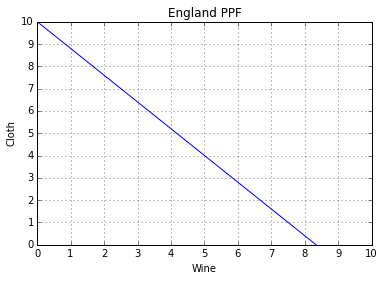

In [257]:
%matplotlib inline
ax, d1 = england.PPF(unit_change=100, return_data=True)

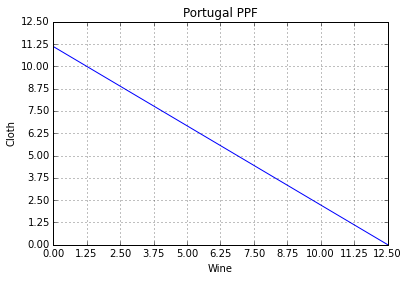

In [258]:
%matplotlib inline
ax, d2 = portugal.PPF(unit_change=100, return_data=True)

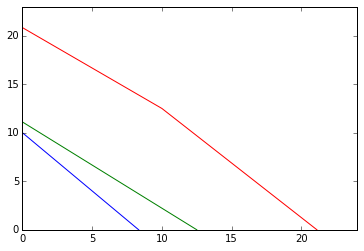

In [262]:
import matplotlib.pyplot as plt
d3a = pd.DataFrame()
d3a["Cloth"] = d2["Cloth"]+10
d3a["Wine"] = d2["Wine"]
d3b = pd.DataFrame()
d3b["Cloth"] = d1["Cloth"]
d3b["Wine"] = d1["Wine"]+12.5
d3 = d3a.append(d3b) 
plt.plot(d1.values[:,0], d1.values[:,1], d2.values[:,0], d2.values[:,1], d3.values[:,0], d3.values[:,1])
plt.axis([0,24,0,23])
plt.show()

In [234]:
d3

,Wine,Cloth
0,10.00,22.5
100,11.25,21.5
200,12.50,20.5
300,13.75,19.5
400,15.00,18.5
500,16.25,17.5
600,17.50,16.5
700,18.75,15.5
800,20.00,14.5
900,21.25,13.5


The Ricardian Model
===================

The Ricardian model describes a static equilibrium and therefore assumes that the supply of resources in the economy is inelastic and that tastes and technology do not change. 

Assumptions
-----------

  - Two Countries ("Home" and "Foreign" denoted with *)
  - Two Final Products (Good 1 and Good 2)
  - Each Good uses Labour as the only factor in production. Labour is homogenous in quality and capability. 
  - Labour is inelastically supplied in each country
  - Labour is perfectly mobile within countries but not between countries
  - Constant Labour requirements per unit of output ($a_j$ and $a_j^*$). Constant Returns to Scale
  - Technologies differ between countries ($a_j \ne a_j^*$ where $j=1,2$)
  - No transportation costs, No Trade Barriers, Free Trade
  - Competative factor and product markets
  
Supply Side (Production)
------------------------

Define relative price $p=\frac{p_2}{p_1}$ of the second good in terms of the first. Let the production function of the jth industry be $q_j = \frac{1}{a_j}L_j$ where {j=1,2}. 


Demand Side (Tastes and Preferences)
------------------------------------

Extensions
==========

Eaton, Kortum (2002) - EK Model with Many Countries and Many Products